<a href="https://colab.research.google.com/github/mingyung-park/2023-2ML-Team-JARVIS/blob/main/modelload.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [For Colaboratory]
1. mount google drive to get raw data
- or you can upload your data directly to colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. clone github repository

In [4]:
import shutil

shutil.rmtree('/content/2023-2ML-Team-JARVIS')

In [5]:
!git clone --branch main https://github.com/mingyung-park/2023-2ML-Team-JARVIS

Cloning into '2023-2ML-Team-JARVIS'...
remote: Enumerating objects: 121, done.
remote: Counting objects: 100% (121/121), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 121 (delta 55), reused 57 (delta 18), pack-reused 0
Receiving objects: 100% (121/121), 3.83 MiB | 8.94 MiB/s, done.
Resolving deltas: 100% (55/55), done.


---

# Set directory path
- change following path if you need

In [7]:
# where cloned repository located
GIT_REPO_PATH = "/content/2023-2ML-Team-JARVIS"
#GIT_REPO_PATH = "."

- add path to import modules

In [9]:
import sys, os
os.chdir(GIT_REPO_PATH)
GIT_REPO_PATH = os.path.abspath(".")
sys.path.append(f"{GIT_REPO_PATH}/code")

import preprocessing, commonUtils, evaluation

# import models
import models.knnModel
'''import models.naiveBayesModel
import models.svmModel
import models.treeModel'''
import experiments.experiment1
import experiments.experiment2
import experiments.common

from importlib import reload
reload(models.knnModel)
'''reload(models.naiveBayesModel)
reload(models.svmModel)
reload(models.treeModel)'''
reload(evaluation)
reload(experiments.experiment1)
reload(experiments.common)
reload(preprocessing)

<module 'preprocessing' from '/content/2023-2ML-Team-JARVIS/code/preprocessing.py'>

- process raw data
- save in pickle file

# Parse raw data

In [16]:
# where raw data located
RAW_DATA_DIRECTORY = "/content/drive/MyDrive"
#RAW_DATA_DIRECTORY = "./data"

In [17]:
preprocessing.parse_raw_data(
    monitored_path=f"{RAW_DATA_DIRECTORY}/mon_standard.pkl",
    unmonitored_path=f"{RAW_DATA_DIRECTORY}/unmon_standard10.pkl",
    dest=f"{GIT_REPO_PATH}/data/original"
)

Loading datafile... : /content/drive/MyDrive/mon_standard.pkl
Done.

Loading datafile... : /content/drive/MyDrive/unmon_standard10.pkl
Done.

parsing dataset...
Done.



# Experiments

## Experiments 1
[target World] - only closed world

[Features] - code/config/experiment1.json
only with categorical features.

- total count
- incoming count
- outgoing count
- incoming rate
- outgoing rate


[Models]
- KNN with standard scaler (models.knnModel.KNNModel)
- NaiveBayes (models.naiveBayesModel.NaiveBayesModel)
- SVM (models.svmModel.SVMModel)
- Random forest (models.treeModel.RandomForestModel)
- Bagging classifier with DecisionTreeClassifier as estimator (models.treeModel.BaggingClassifierModel)

In [18]:
!mkdir -p ./result/experiment1/models
!mkdir -p ./result/experiment1/confusion-matrix

In [ ]:
experiments.experiment1.do_experiment(
    base_path=GIT_REPO_PATH,
    result_dir="./result/experiment1",
)

processing data with /content/2023-2ML-Team-JARVIS/code/config/experiment1.json
Loading datafile... : ./data/original/timestamps.pkl
Done.

Loading datafile... : ./data/original/directions.pkl
Done.

Loading datafile... : ./data/original/label.pkl
Done.

extracting features...
Done.

Training KNN-with-StandardScaler
Fitting 5 folds for each of 24 candidates, totalling 120 fits
best param: {'knn__metric': 'manhattan', 'knn__n_neighbors': 6, 'knn__weights': 'distance'}
saving models...: ./result/experiment1/models/KNN-with-StandardScaler.pkl
Done.

Training NaiveBayes
Fitting 5 folds for each of 10 candidates, totalling 50 fits
best param: {'var_smoothing': 1e-09}
saving models...: ./result/experiment1/models/NaiveBayes.pkl
Done.

Training SVM
Fitting 5 folds for each of 9 candidates, totalling 45 fits


## Experiments 2
[target World] - only closed world

[Features] - code/config/experiment2.json
only with categorical features.

- total count
- incoming count
  - of total packet
  - of first 10, 20, 30, 40, 50 packets
- outgoing count
  - of total packet
  - of first 10, 20, 30, 40, 50 packets
- incoming rate
  - of total packet
  - of first 10, 20, 30, 40, 50 packets
- outgoing rate
  - of total packet
  - of first 10, 20, 30, 40, 50 packets


[Models]
- KNN with standard scaler (models.knnModel.KNNModel)
- NaiveBayes (models.naiveBayesModel.NaiveBayesModel)
- SVM (models.svmModel.SVMModel)
- Random forest (models.treeModel.RandomForestModel)
- Bagging classifier with DecisionTreeClassifier as estimator (models.treeModel.BaggingClassifierModel)

In [ ]:
!mkdir -p ./result/experiment2/models
!mkdir -p ./result/experiment2/confusion-matrix

processing data with /Users/jiyoung/Documents/projects/2023-2ML-Team-JARVIS/code/config/experiment2.json
Loading datafile... : ./data/original/timestamps.pkl
Done.

Loading datafile... : ./data/original/directions.pkl
Done.

Loading datafile... : ./data/original/label.pkl
Done.

extracting features...
Done.

Training KNN-with-StandardScaler
Fitting 5 folds for each of 40 candidates, totalling 200 fits
best param: {'knn__metric': 'manhattan', 'knn__n_neighbors': 6, 'knn__weights': 'distance'}
saving models...: ./result/experiment2/models/KNN-with-StandardScaler.pkl
Done.

Training NaiveBayes
Fitting 5 folds for each of 10 candidates, totalling 50 fits
best param: {'var_smoothing': 1e-08}
saving models...: ./result/experiment2/models/NaiveBayes.pkl
Done.

Training SVM
Fitting 5 folds for each of 9 candidates, totalling 45 fits
best param: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
saving models...: ./result/experiment2/models/SVM.pkl
Done.

Training RandomForest
Fitting 5 folds for each o

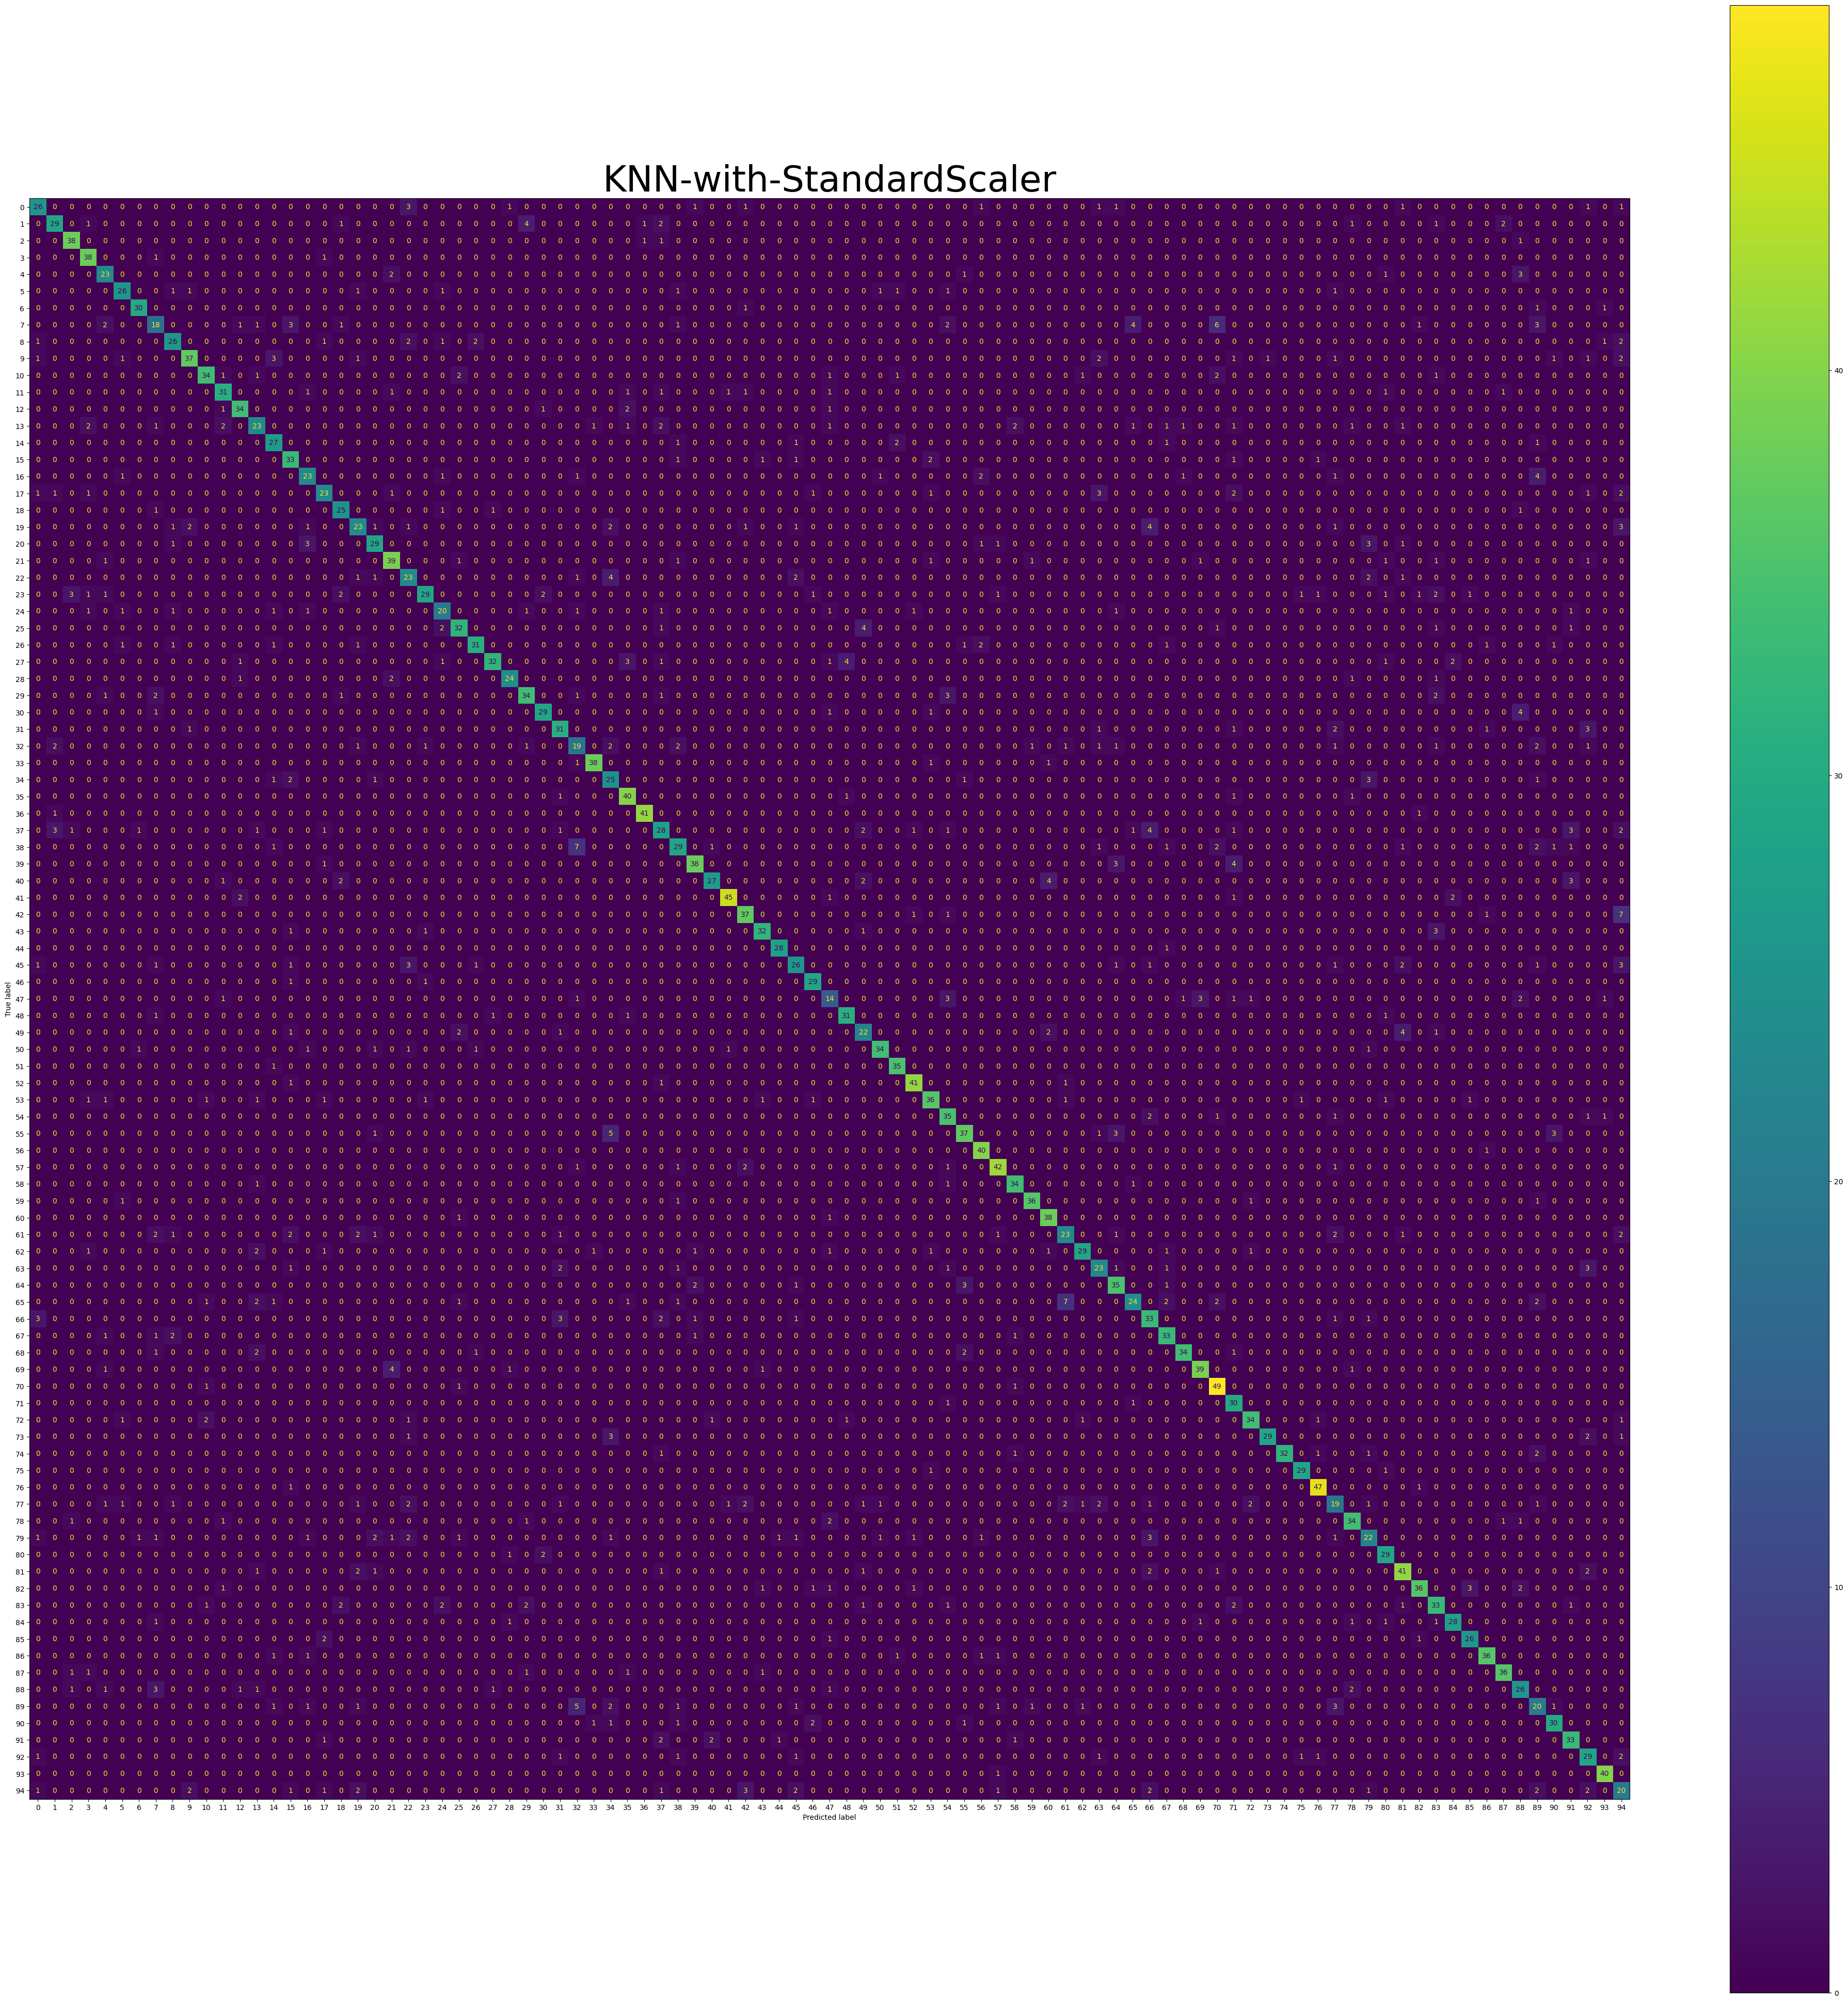

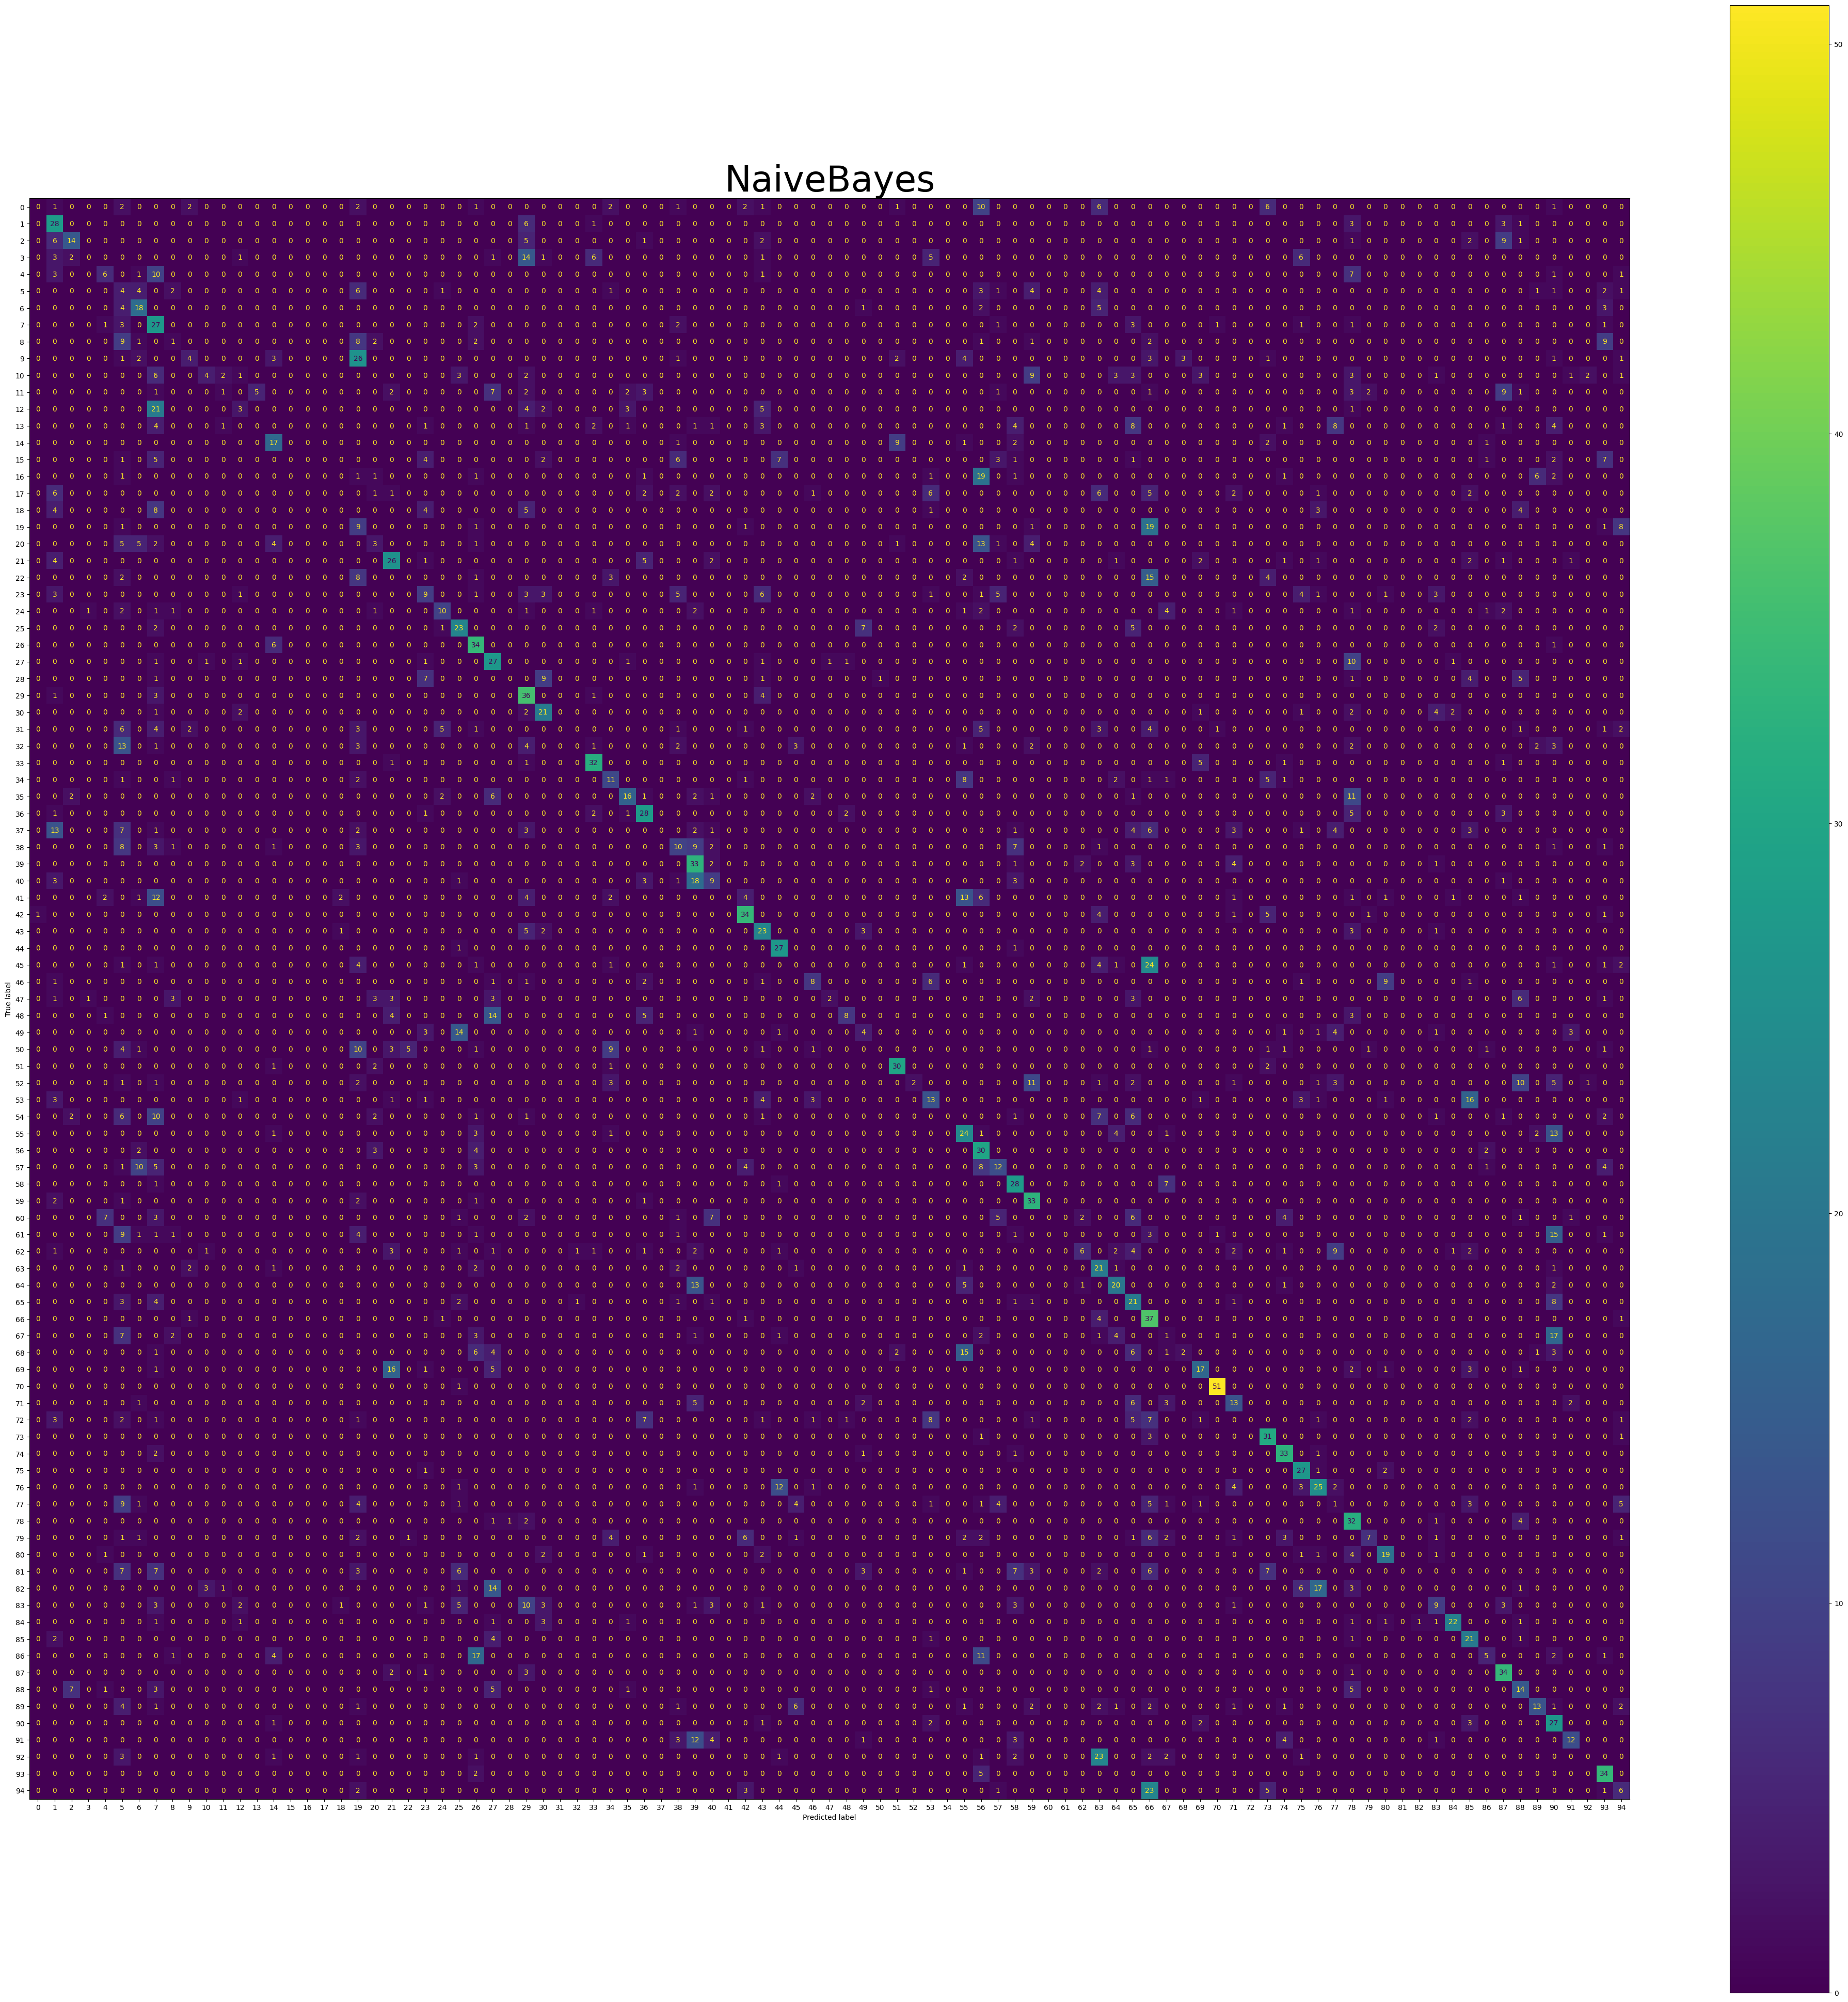

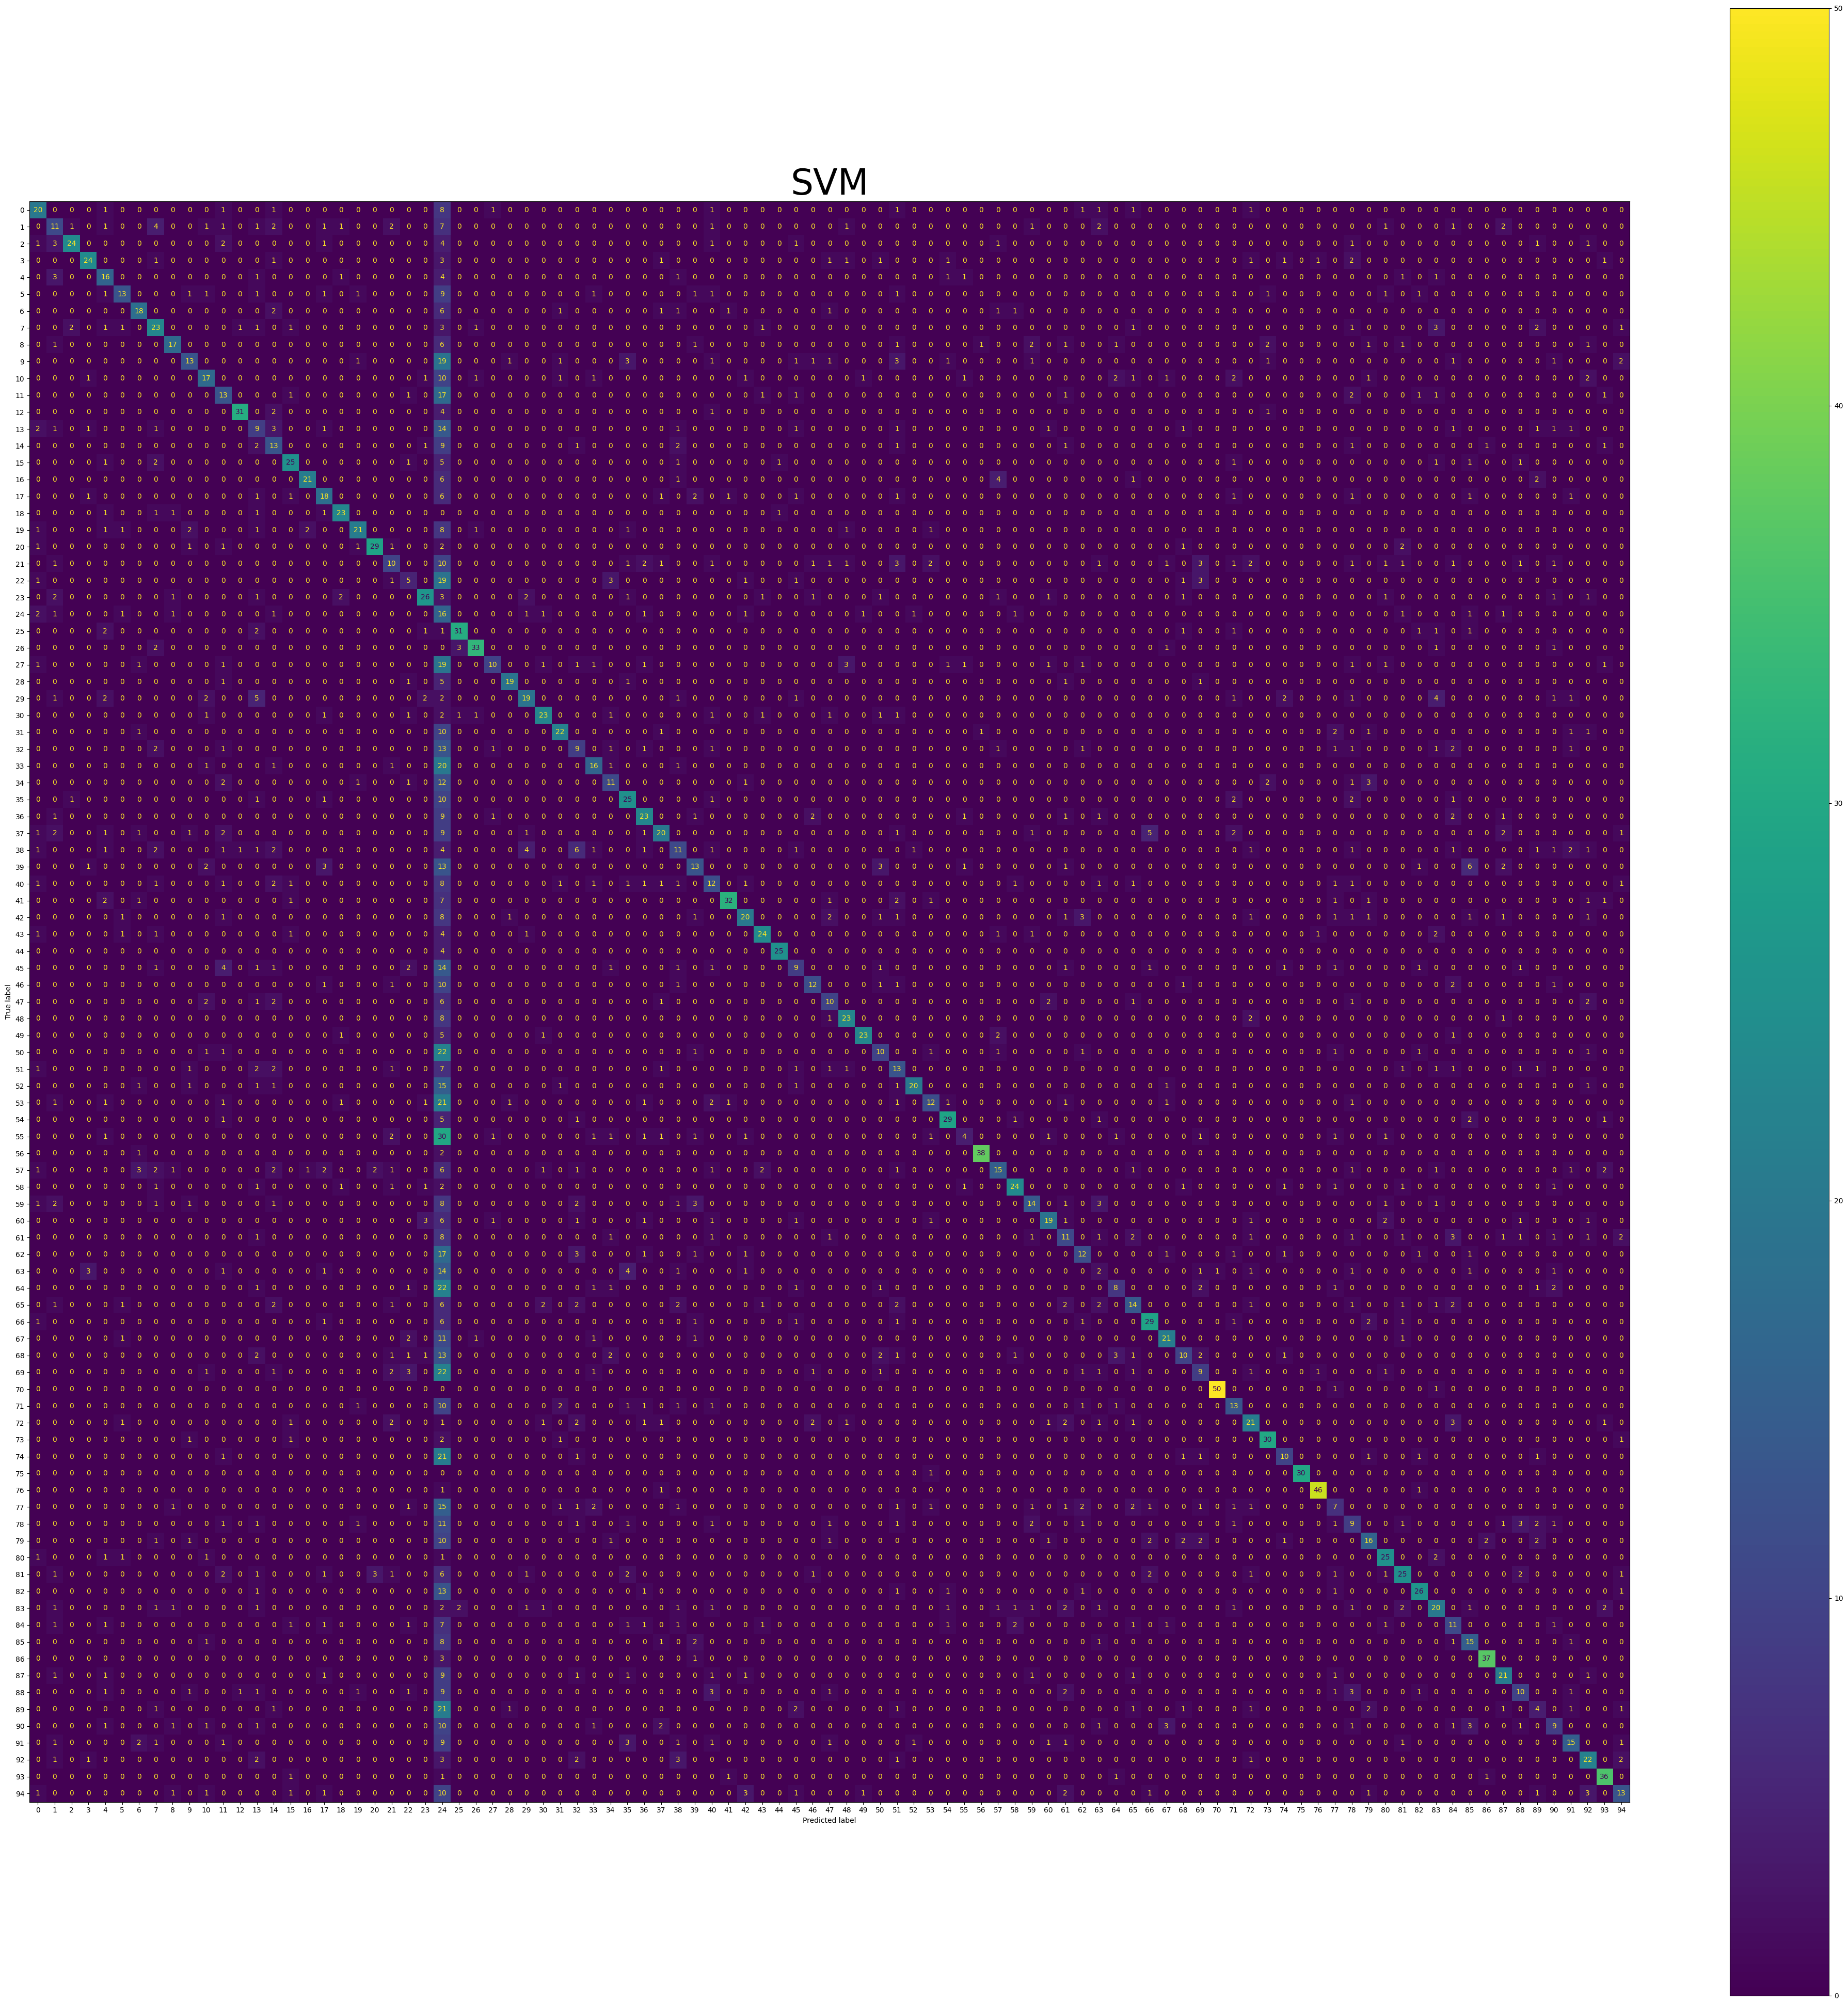

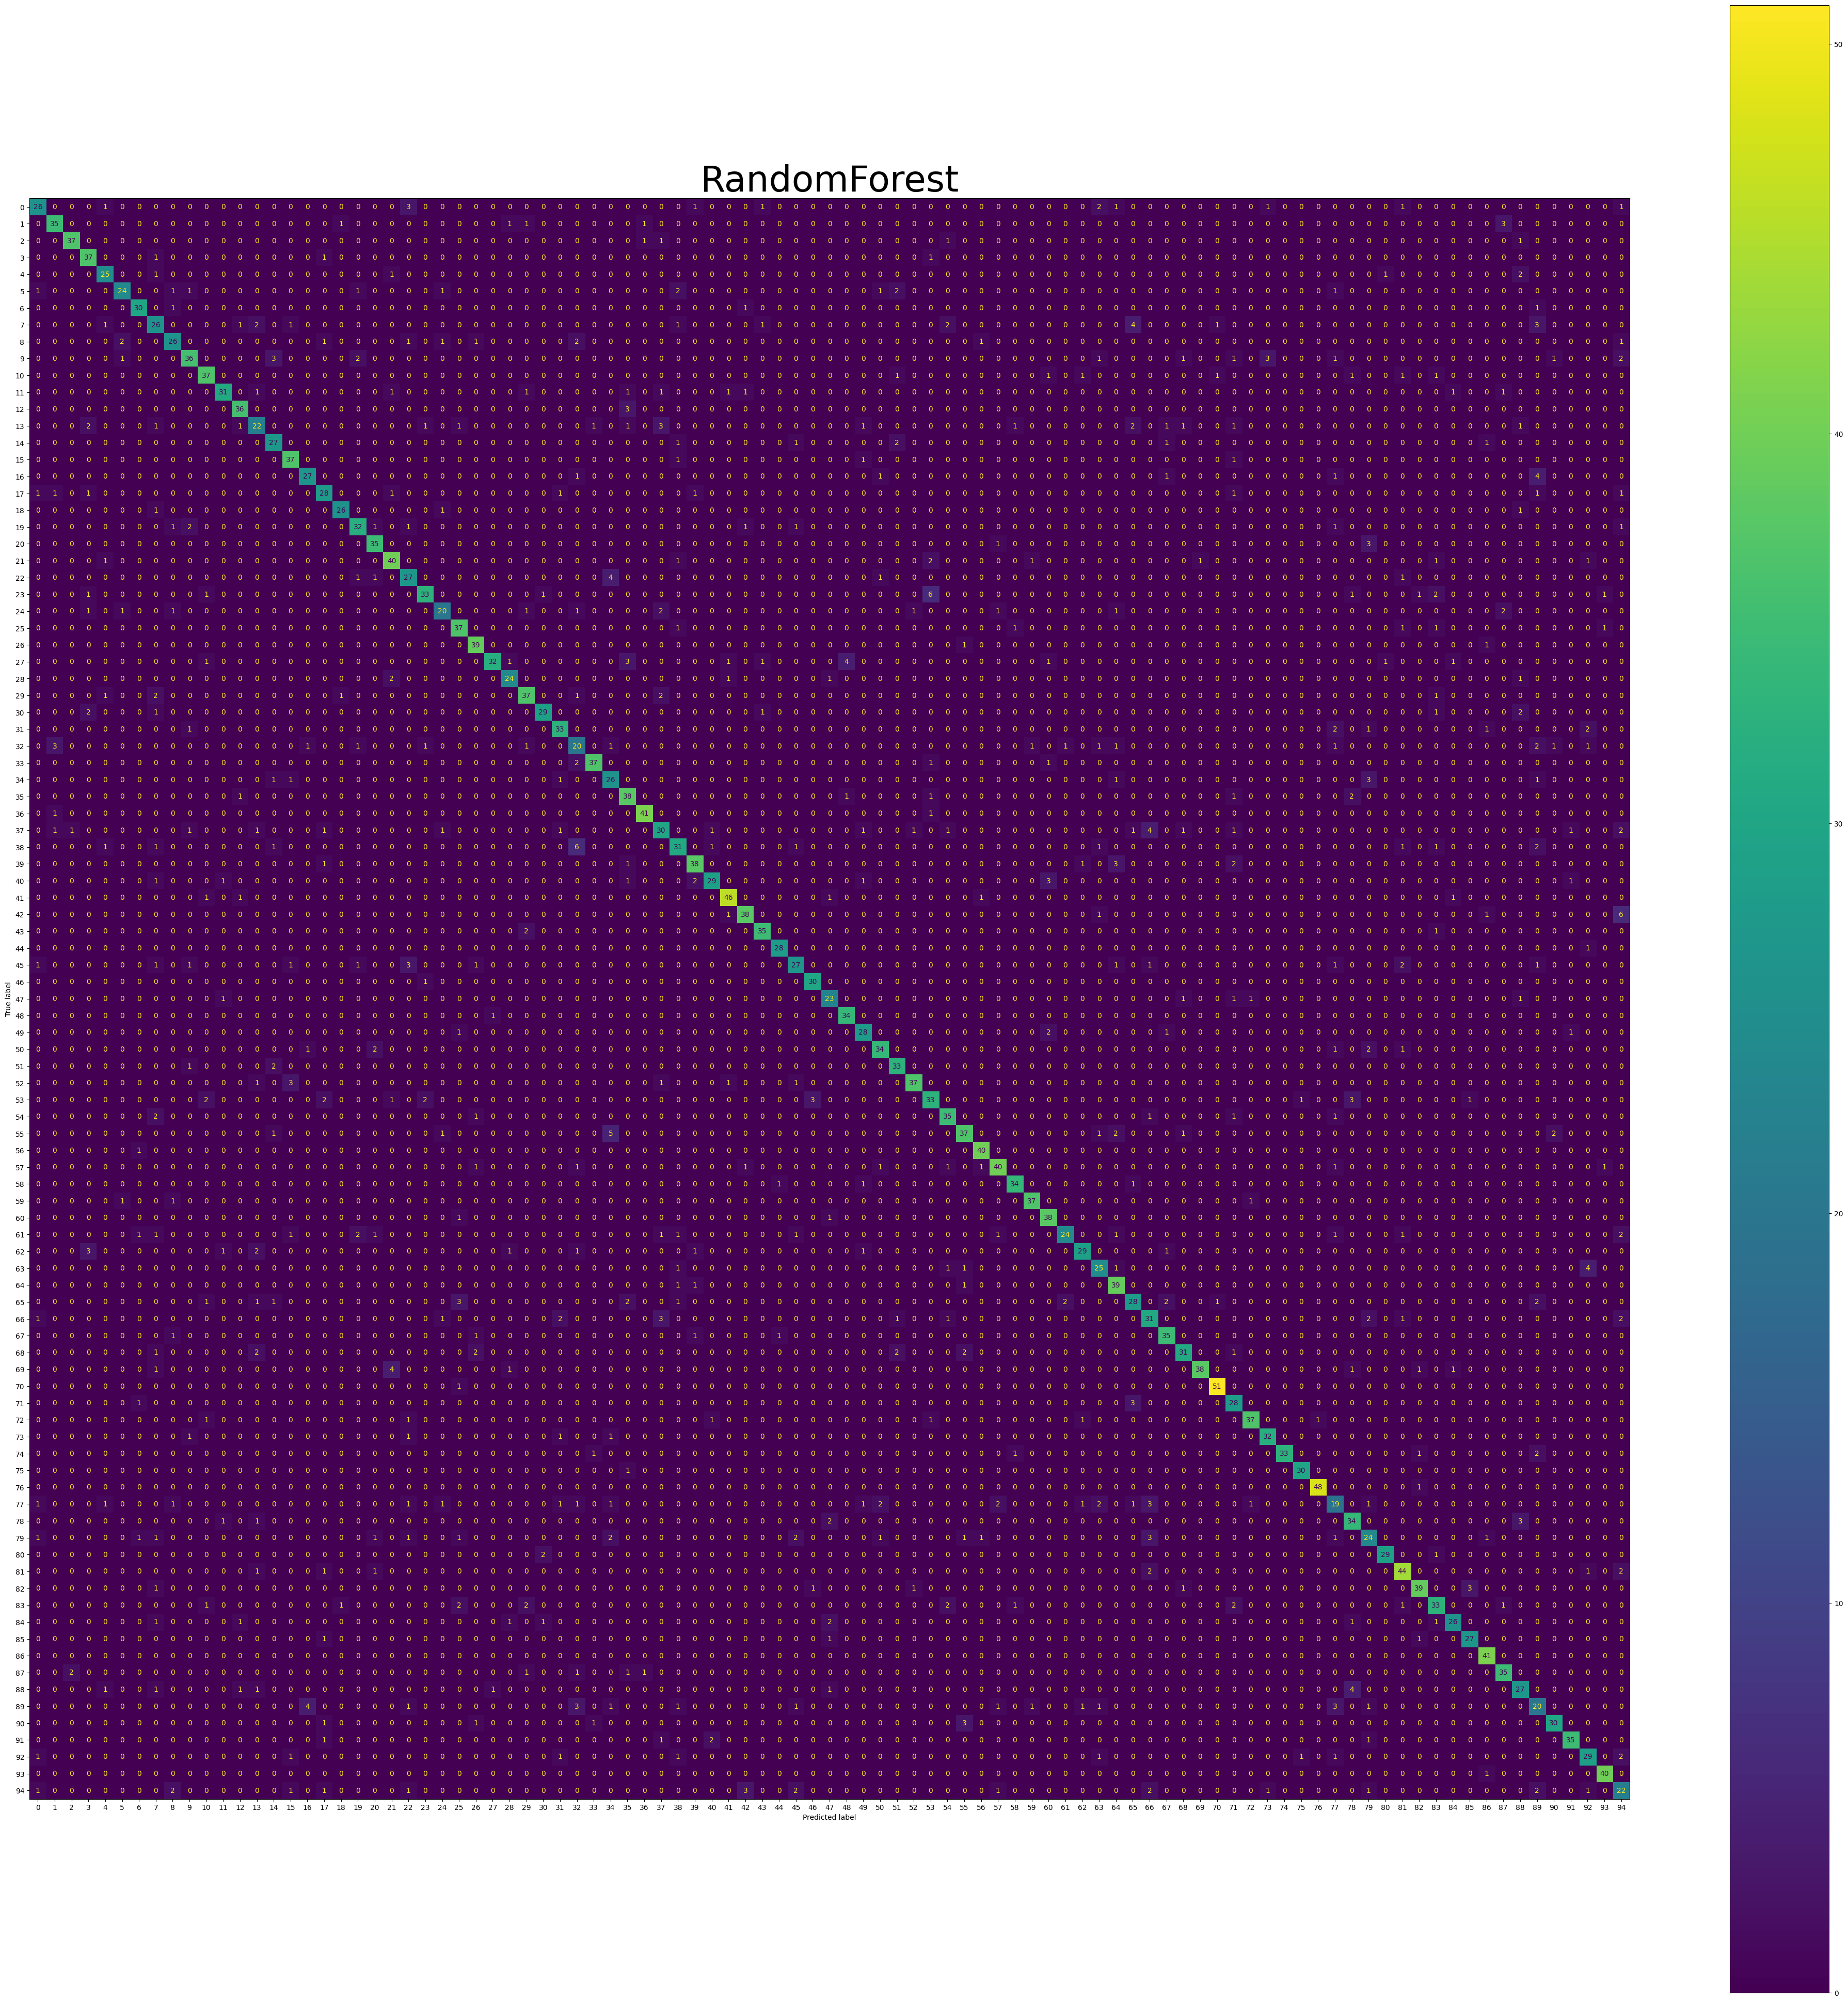

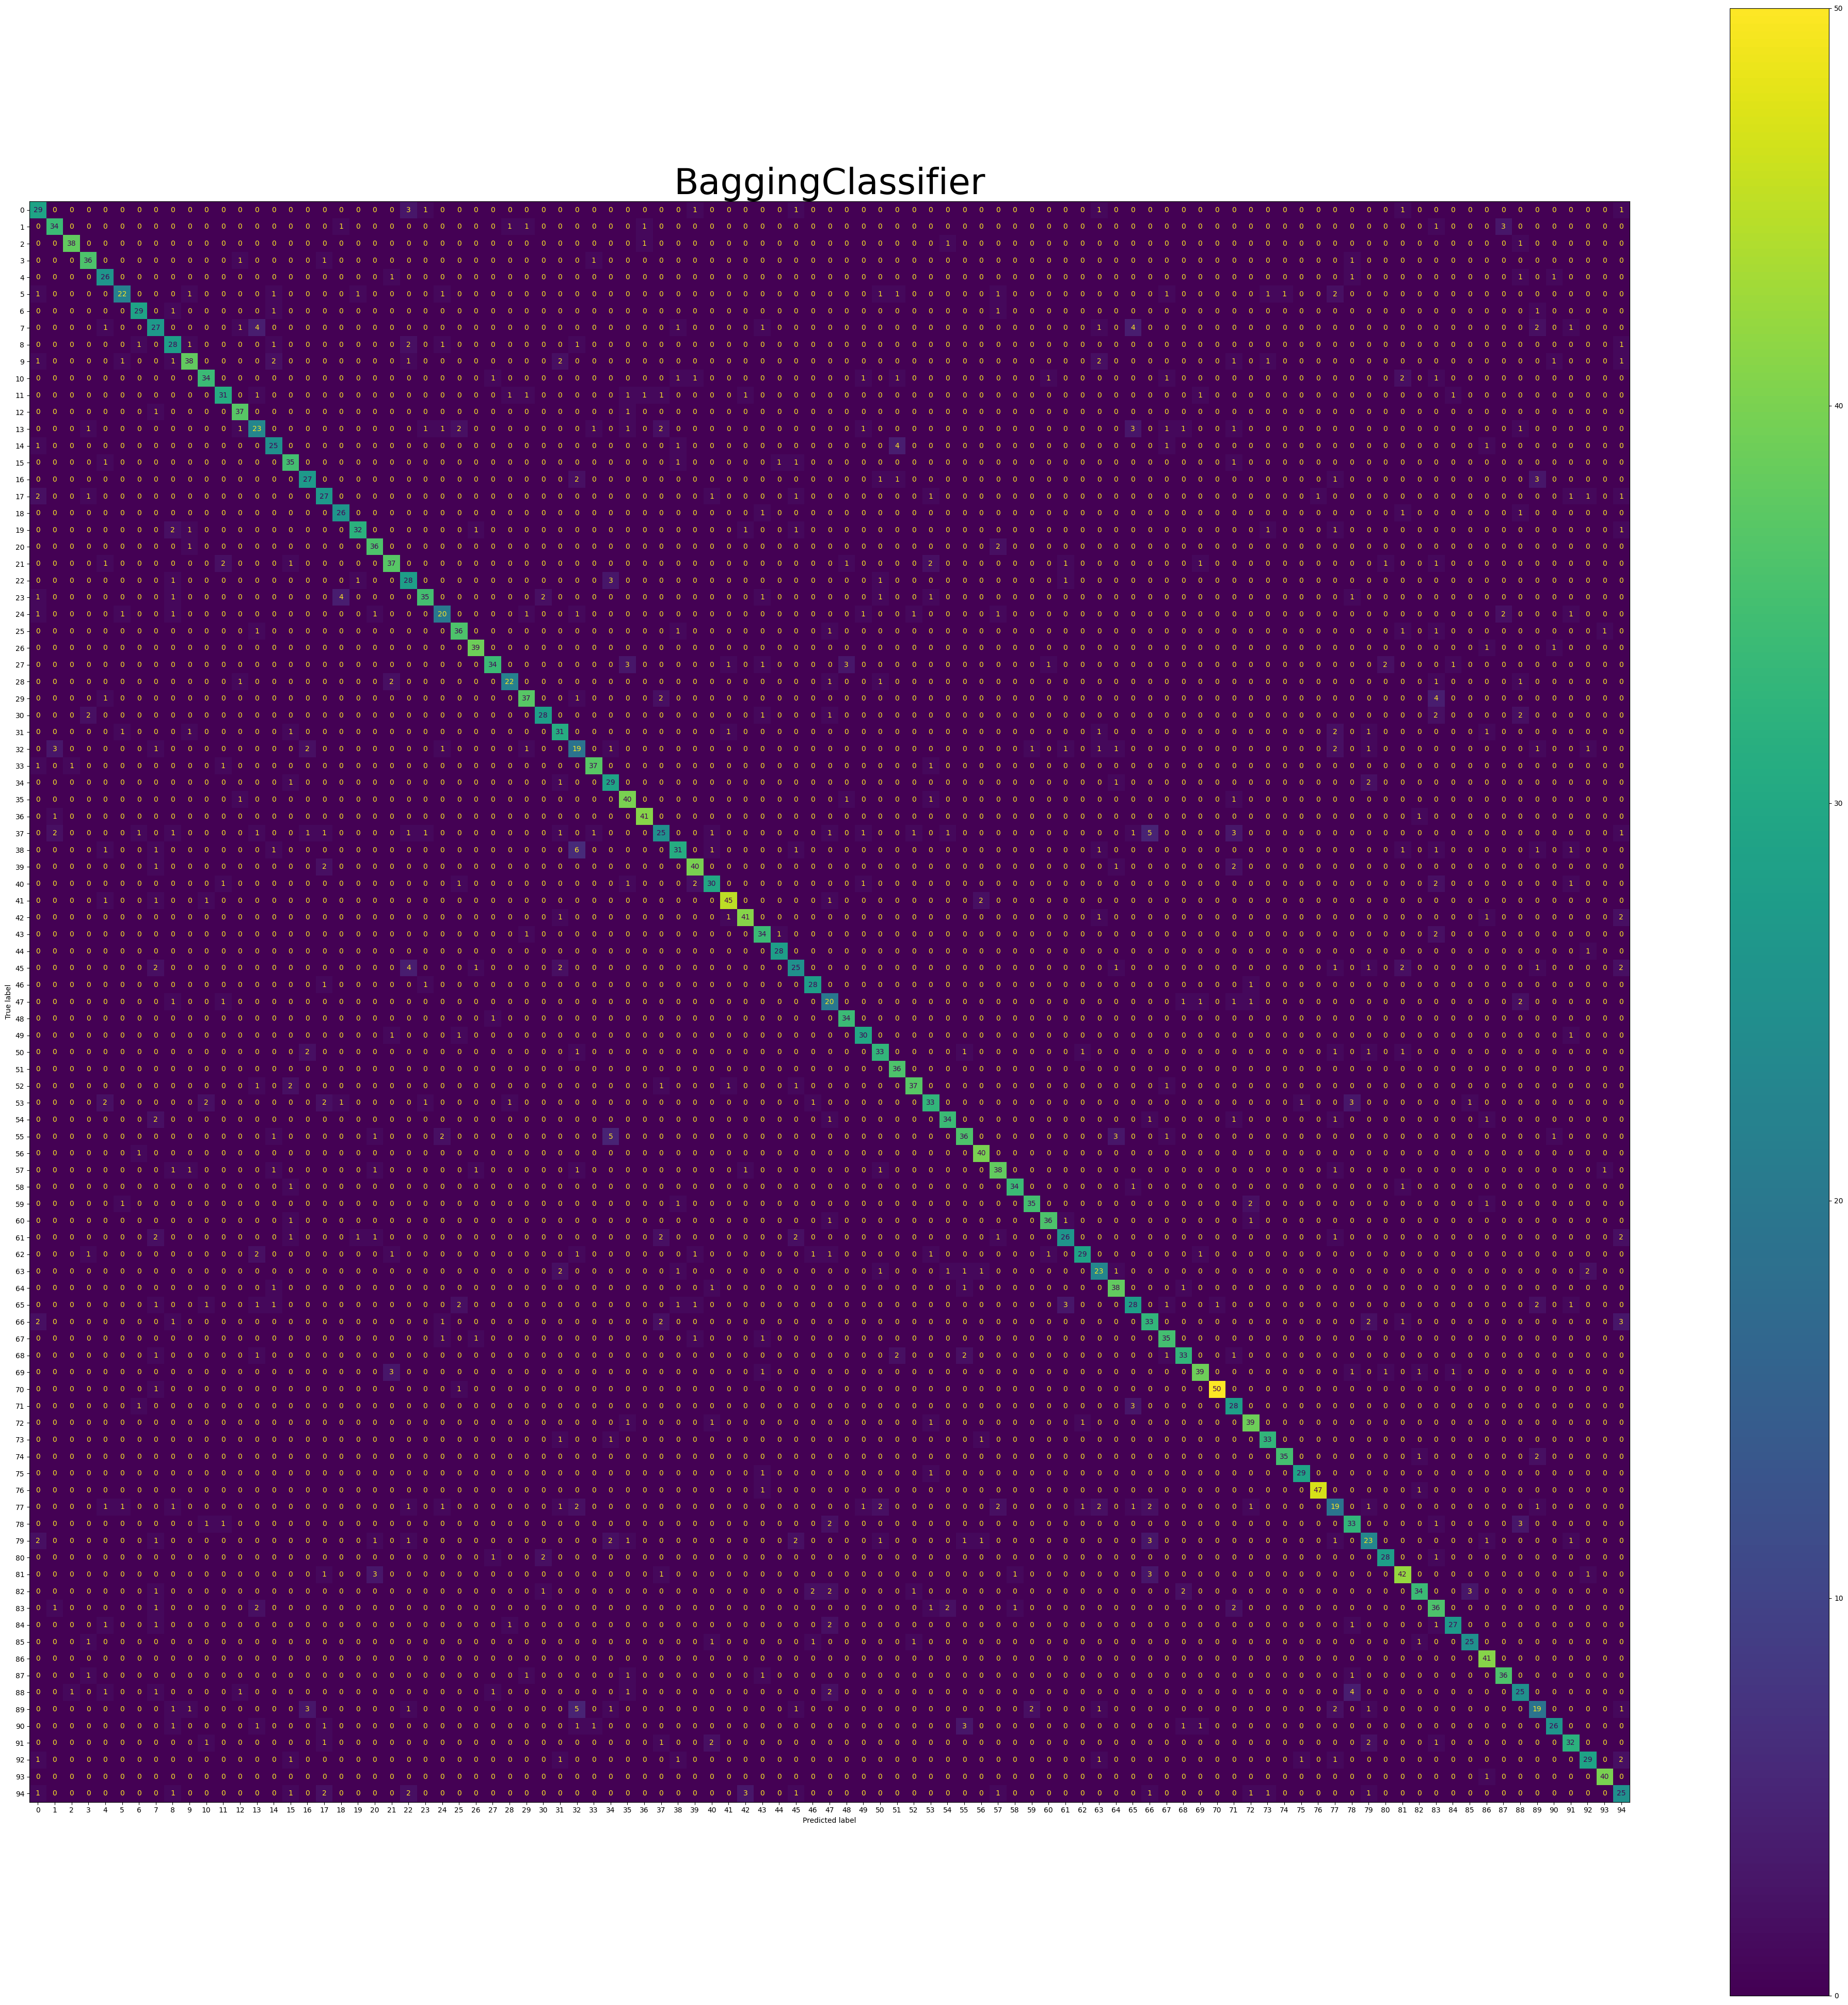

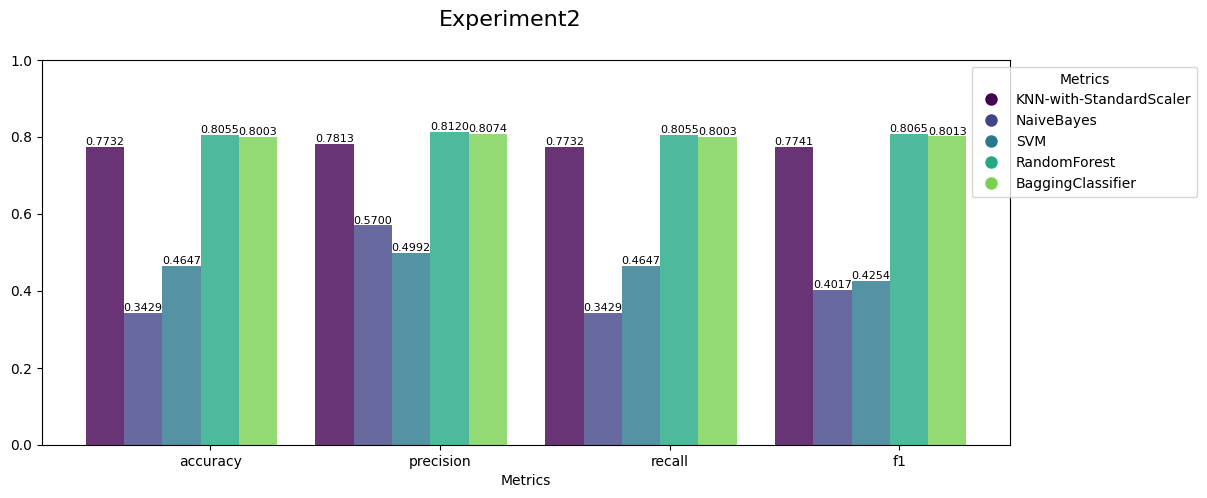

In [ ]:
experiments.experiment2.do_experiment(
    base_path=GIT_REPO_PATH,
    result_dir="./result/experiment2",
)

# Example code for manual training

## Extract features

- using specific config file which determine how to process data

In [ ]:
df = preprocessing.process_data(
    config_path="./code/config/default.json",
    path_to_save="./data/default.pkl",
)

Loading datafile... : ./data/original/timestamps.pkl
Done.

Loading datafile... : ./data/original/directions.pkl
Done.

Loading datafile... : ./data/original/label.pkl
Done.

extracting features...
Done.



## training model

### 1. set `mode`
- "CM": closed multi label
- "OM": open multi label
- "OB": open binary label

In [ ]:
train_x, test_x, train_y, test_y = preprocessing.filter_dataset(df=df, mode="OM")

- or you can use saved dataset

In [ ]:
train_x, test_x, train_y, test_y = preprocessing.filter_dataset(
    data_path="./data/default.pkl", mode="OM"
)

Loading datafile... : ./data/default.pkl
Done.



### 2. train & save model

In [ ]:
rfc = models.treeModel.RandomForestModel()

rfc.fit(train_x, train_y)
rfc.save_model("./result/test_rfc.pkl")

knn = models.knnModel.KNNModel()
knn.fit(train_x, train_y)
knn.save_model("./result/test_knn.pkl")

## evaluate model

### visualize confusion matrix

In [ ]:
evaluation.show_confusion_matrix(
    test_x,
    test_y,
    title=f"Test: {rfc.name}",
    model=rfc,
    normalize="true",
    save_fig_path=f"./result/confusion-matrix-{rfc.name}",
)

evaluation.show_confusion_matrix(
    test_x,
    test_y,
    title=f"Test: {knn.name}",
    model=knn,
    normalize="true",
    save_fig_path=f"./result/confusion-matrix-{knn.name}",
)

- or you can use saved model

In [ ]:
evaluation.show_confusion_matrix(
    test_x,
    test_y,
    title=f"Test: {rfc.name}",
    model_path=rfc.path,
    normalize="true",
    save_fig_path=f"./result/confusion-matrix-{rfc.name}",
)

evaluation.show_confusion_matrix(
    test_x,
    test_y,
    title=f"Test: {knn.name}",
    model_path=rfc.path,
    normalize="true",
    save_fig_path=f"./result/confusion-matrix-{knn.name}",
)

### compare two model

Model Evaluation for rfc - accuracy: 0.9512
Model Evaluation for rfc - precision: 0.9528
Model Evaluation for rfc - recall: 0.9512
Model Evaluation for rfc - f1: 0.9510
Model Evaluation for knn - accuracy: 0.9267
Model Evaluation for knn - precision: 0.9293
Model Evaluation for knn - recall: 0.9267
Model Evaluation for knn - f1: 0.9257


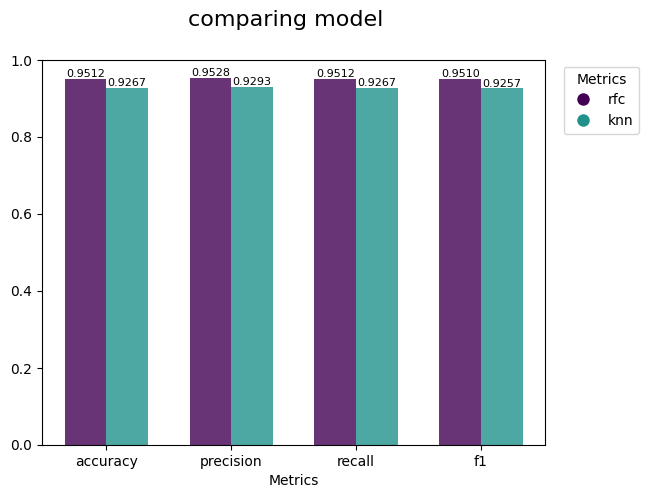

In [ ]:
names = ["rfc", "knn"]
datasets = [(test_x, test_y)] * 2
evaluation.compare_scores(
    names,
    datasets,
    "comparing model",
    models=[rfc, knn],
)

- or you can use saved model

Loading datafile... : ./result/test_rfc.pkl
Done.

Loading datafile... : ./result/test_knn.pkl
Done.

Model Evaluation for rfc - accuracy: 0.9512
Model Evaluation for rfc - precision: 0.9528
Model Evaluation for rfc - recall: 0.9512
Model Evaluation for rfc - f1: 0.9510
Model Evaluation for knn - accuracy: 0.9267
Model Evaluation for knn - precision: 0.9293
Model Evaluation for knn - recall: 0.9267
Model Evaluation for knn - f1: 0.9257


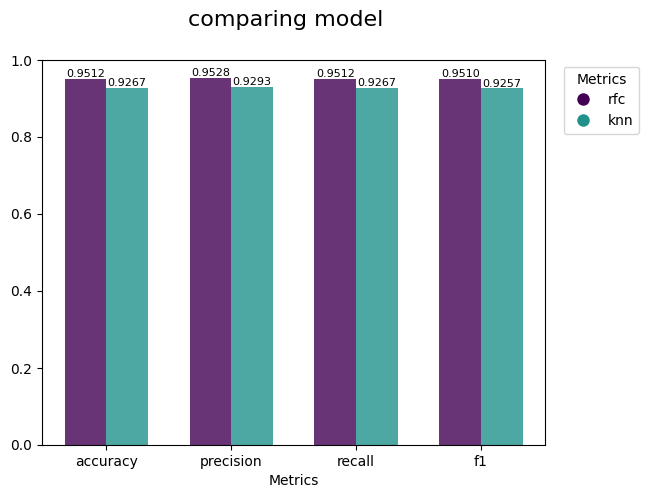

In [ ]:
names = ["rfc", "knn"]
datasets = [(test_x, test_y)] * 2
evaluation.compare_scores(
    names,
    datasets,
    "comparing model",
    model_paths=[rfc.path, knn.path],
)

In [82]:
import joblib

nm_ex1 = joblib.load("/content/2023-2ML-Team-JARVIS/result/experiment1/models/NaiveBayes.pkl")


AttributeError: ignored

In [29]:
print(knn_ex1.model.best_estimator_)
print(knn_ex1.model.feature_names_in_)
print(knn_ex1.model.best_score_)


Pipeline(steps=[('ss', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=6,
                                      weights='distance'))])
['count' '_incoming_count' '_incoming_rate' '_outgoing_count'
 '_outgoing_rate']
0.4324342105263158


In [55]:
dataset=joblib.load("/content/2023-2ML-Team-JARVIS/data/experiment1.pkl")
dataset=dataset[dataset['label']>=0]

In [56]:
dataset

count  _incoming_count  _incoming_rate  _outgoing_count  \
0       1421             1300        0.914849              121   
1        518              438        0.845560               80   
2       1358             1240        0.913108              118   
3       1446             1324        0.915629              122   
4       1406             1291        0.918208              115   
...      ...              ...             ...              ...   
18995   9434             8815        0.934386              619   
18996   9956             9404        0.944556              552   
18997   9952             9373        0.941821              579   
18998   9926             9236        0.930486              690   
18999   9925             9168        0.923728              757   

       _outgoing_rate  label  
0            0.085151      0  
1            0.154440      0  
2            0.086892      0  
3            0.084371      0  
4            0.081792      0  
...               ...    ...  
18995        0.065614     94  
18996        0.055444     94  
18997        0.058179     94  
18998        0.069514     94  
18999        0.076272     94  

[19000 rows x 6 columns]

from matplotlib import pyplot as plt
dataset['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dataset['_incoming_count'].plot(kind='hist', bins=20, title='_incoming_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dataset['_incoming_rate'].plot(kind='hist', bins=20, title='_incoming_rate')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dataset['_outgoing_count'].plot(kind='hist', bins=20, title='_outgoing_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dataset.plot(kind='scatter', x='count', y='_incoming_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dataset.plot(kind='scatter', x='_incoming_count', y='_incoming_rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dataset.plot(kind='scatter', x='_incoming_rate', y='_outgoing_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dataset.plot(kind='scatter', x='_outgoing_count', y='_outgoing_rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['label']
  ys = series['count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = dataset.sort_values('label', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('label')
_ = plt.ylabel('count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['label']
  ys = series['_incoming_count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = dataset.sort_values('label', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('label')
_ = plt.ylabel('_incoming_count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['label']
  ys = series['_incoming_rate']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = dataset.sort_values('label', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('label')
_ = plt.ylabel('_incoming_rate')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['label']
  ys = series['_outgoing_count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = dataset.sort_values('label', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('label')
_ = plt.ylabel('_outgoing_count')

from matplotlib import pyplot as plt
dataset['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
dataset['_incoming_count'].plot(kind='line', figsize=(8, 4), title='_incoming_count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
dataset['_incoming_rate'].plot(kind='line', figsize=(8, 4), title='_incoming_rate')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
dataset['_outgoing_count'].plot(kind='line', figsize=(8, 4), title='_outgoing_count')
plt.gca().spines[['top', 'right']].set_visible(False)

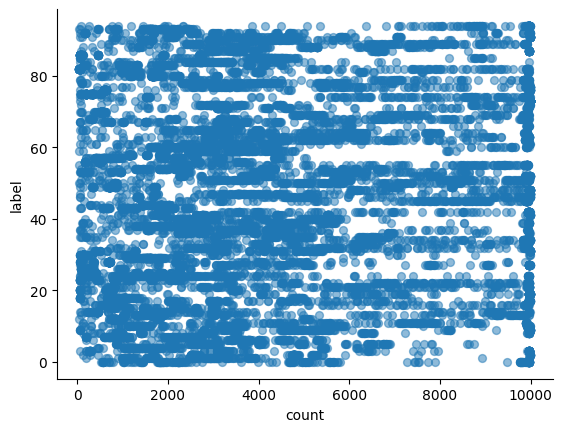

In [74]:
dataset.plot(kind='scatter', x='count', y='label', s=32, alpha=.5)
plt.gca().spines[['top', 'right',]].set_visible(False)

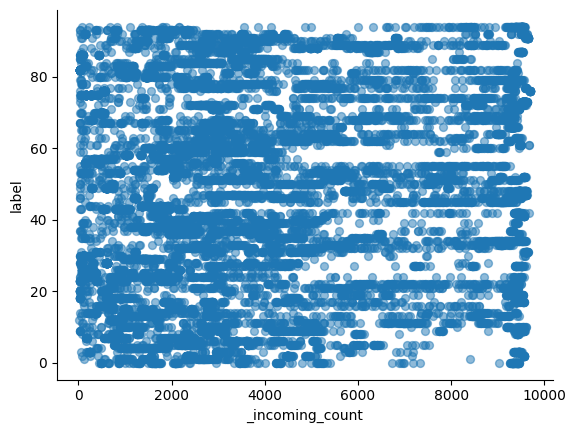

In [75]:
dataset.plot(kind='scatter', x='_incoming_count', y='label', s=32, alpha=.5)
plt.gca().spines[['top', 'right',]].set_visible(False)

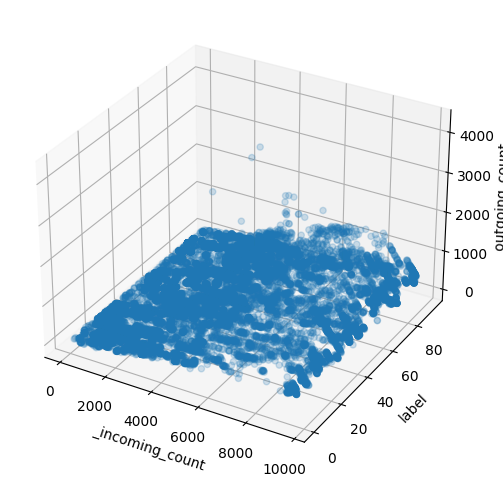

In [80]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('_incoming_count')
ax.set_ylabel('label')
ax.set_zlabel('_outgoing_count')
ax.scatter(dataset['_incoming_count'], dataset['label'], dataset['_outgoing_count'], alpha=0.2)
plt.show()

In [ ]:
dataset.plot(kind='scatter', x='_outgoing_count', y='_incoming_count', s=32, alpha=.5)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [58]:
corr_matrix=dataset.corr(numeric_only=True)
corr_matrix['label']

count              0.112601
_incoming_count    0.109466
_incoming_rate     0.006159
_outgoing_count    0.115715
_outgoing_rate    -0.006159
label              1.000000
Name: label, dtype: float64

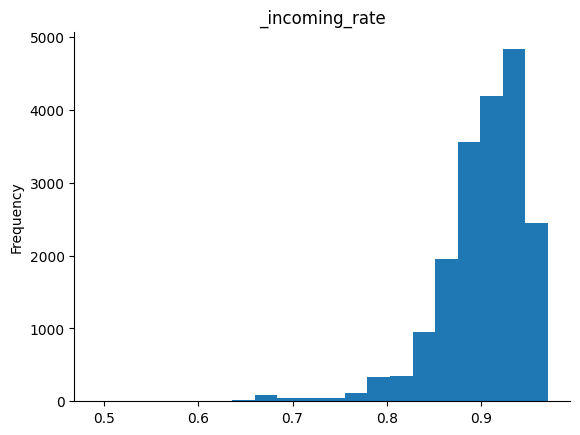

In [59]:
from matplotlib import pyplot as plt
dataset['_incoming_rate'].plot(kind='hist', bins=20, title='_incoming_rate')
plt.gca().spines[['top', 'right',]].set_visible(False)

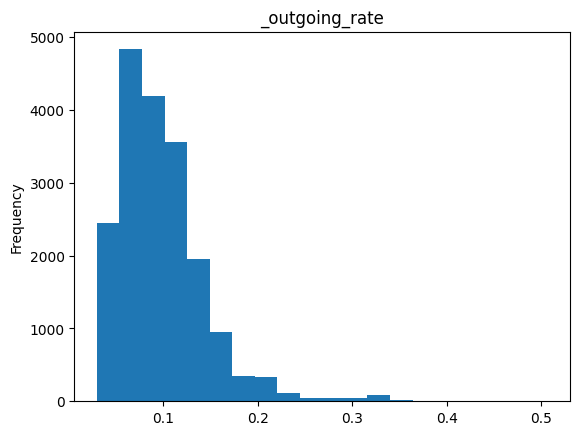

In [60]:
dataset['_outgoing_rate'].plot(kind='hist', bins=20, title='_outgoing_rate')
plt.gca().spines[['top', 'right',]].set_visible(True)

In [ ]:
model =